# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# Reading dataset

In [2]:
#read data and assign to 'df'
df=pd.read_csv('winequality-white.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:xlabel='fixed acidity', ylabel='count'>

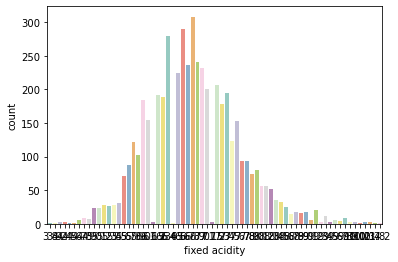

In [6]:
sns.countplot(x=df['fixed acidity'],palette="Set3",linewidth=20)

In [7]:
df.drop_duplicates(inplace=True)

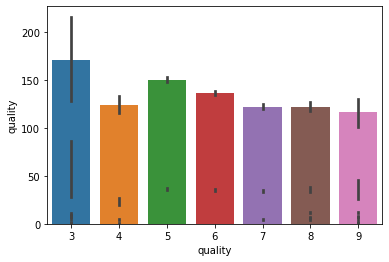

In [8]:
for col in df.columns:
    sns.barplot(x=df['quality'],y=col,data=df)

# Feature Engineering

In [9]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_quality = LabelEncoder()

In [11]:
# Make target variable is [0,1]
df['quality'] = label_quality.fit_transform(df['quality'])

# Create X , y ========>X for inputs ,y for output

In [12]:
X=df.drop('quality',axis=1)

In [13]:
y=df['quality']

In [14]:
X.shape

(3961, 11)

In [15]:
y.shape

(3961,)

# Splitting data

In [16]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=44)

In [17]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2513,6.9,0.34,0.36,1.4,0.032,13.0,145.0,0.99214,3.07,0.52,9.8
3205,6.8,0.45,0.36,5.0,0.033,28.0,156.0,0.99100,3.11,0.40,12.4
1094,7.4,0.24,0.31,8.4,0.045,52.0,183.0,0.99630,3.09,0.32,8.8
4471,6.2,0.20,0.28,1.1,0.039,24.0,78.0,0.98990,3.36,0.47,12.1
1718,9.3,0.20,0.33,1.7,0.050,28.0,178.0,0.99540,3.16,0.43,9.0


In [18]:
sc=StandardScaler()

In [19]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# Model Training for : Logistic Regression

In [20]:
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
lr_score=lr.score(X_train,y_train)
y_predlr=lr.predict(X_test)


print('The Score of training data is {} '.format(lr_score))
print('The first 5 rows of y prediction is {}'.format(y_predlr[:5]))

The Score of training data is 0.8115530303030303 
The first 5 rows of y prediction is [0 0 1 0 0]


# Model Evaluation for: Logistic Regression

In [21]:
#confusion matrix
lr_cf=confusion_matrix(y_test,y_predlr)
lr_cf

array([[586,  34],
       [126,  47]], dtype=int64)

In [22]:
# accuarcy score
lr_acc=accuracy_score(y_test,y_predlr)
lr_acc

0.798234552332913

In [23]:
#classification report
lr_cr=classification_report(y_test,y_predlr)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       620
           1       0.58      0.27      0.37       173

    accuracy                           0.80       793
   macro avg       0.70      0.61      0.62       793
weighted avg       0.77      0.80      0.77       793



# Model Training for : SVC

In [24]:
svc=SVC()
svc.fit(X_train,y_train)
svc_score=svc.score(X_train,y_train)
y_predsvc=svc.predict(X_test)

print('The Score of training data is {} '.format(svc_score))
print('The first 5 rows of y prediction is {}'.format(y_predsvc[:5]))


The Score of training data is 0.8323863636363636 
The first 5 rows of y prediction is [0 0 0 0 0]


# Model Evaluation for: SVC

In [25]:
#confusion matrix
svc_cf=confusion_matrix(y_test,y_predsvc)
svc_cf

array([[607,  13],
       [120,  53]], dtype=int64)

In [26]:
# accuarcy score
svc_acc=accuracy_score(y_test,y_predsvc)
svc_acc

0.832282471626734

In [27]:
#classification report
svc_cr=classification_report(y_test,y_predsvc)
print(svc_cr)

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       620
           1       0.80      0.31      0.44       173

    accuracy                           0.83       793
   macro avg       0.82      0.64      0.67       793
weighted avg       0.83      0.83      0.80       793



# Model Training for : RandomForestClassifier

In [28]:
rf=RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)
rf_score=rf.score(X_train,y_train)
y_predrf=rf.predict(X_test)

print("the score of training in Random Forest Classifier is :" ,rf_score)
print("the first 5 rows of Y prediction is :",y_predrf[:5])

the score of training in Random Forest Classifier is : 1.0
the first 5 rows of Y prediction is : [0 0 1 0 0]


# Model Evaluation for: RandomForestClassifier

In [29]:
rf_acc=accuracy_score(y_test,y_predrf)
rf_acc

0.8348045397225725

In [30]:
rf_cr=classification_report(y_test,y_predrf)
print(rf_cr)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       620
           1       0.76      0.35      0.48       173

    accuracy                           0.83       793
   macro avg       0.80      0.66      0.69       793
weighted avg       0.83      0.83      0.81       793



In [31]:
rf_cf=confusion_matrix(y_test,y_predrf)
rf_cf

array([[601,  19],
       [112,  61]], dtype=int64)

In [32]:
param={'C':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]}
random=GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=5)

In [33]:
random.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [34]:
random.best_params_

{'C': 1.4, 'gamma': 0.1, 'kernel': 'rbf'}

In [39]:
svc2=SVC(C=1.4,kernel= 'rbf', gamma= 0.1)
svc2.fit(X_train,y_train)
svc2_score=svc2.score(X_train,y_train)
y_predsvc2=svc2.predict(X_test)

print('The Score of training data is {} '.format(svc2_score))
print('The first 5 rows of y prediction is {}'.format(y_predsvc2[:5]))

The Score of training data is 0.8368055555555556 
The first 5 rows of y prediction is [0 0 0 1 0]


In [40]:
print(classification_report(y_test,y_predsvc2))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       620
           1       0.77      0.32      0.46       173

    accuracy                           0.83       793
   macro avg       0.80      0.65      0.68       793
weighted avg       0.82      0.83      0.80       793



In [42]:
rfc_eval = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 5)
rfc_eval.mean()

0.8238601422299301